<a href="https://colab.research.google.com/github/jboyd170/face_mask_detection/blob/master/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

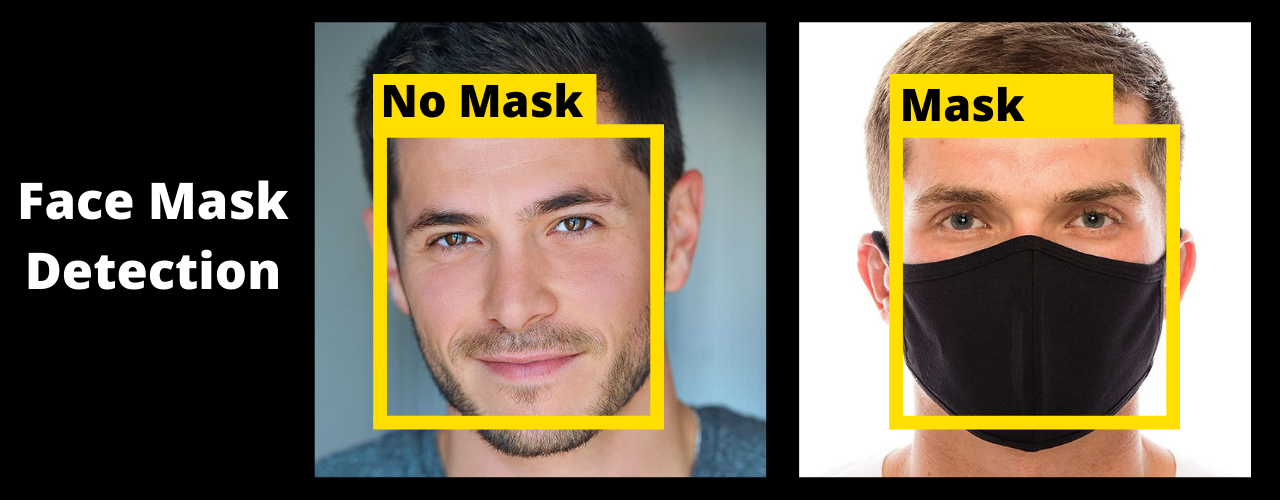

In [ ]:
!git clone https://github.com/jboyd170/face_mask_detection.git
%cd face_mask_detection

In [4]:
# import libraries 
import cv2
import os
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
from google.colab.patches import cv2_imshow

faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_alt2.xml")
model = load_model("mask_recog.h5")

In [ ]:
! dir

face_mask_detection		  image3.png	 multi-face2.jpg
Face_Mask_Detection.ipynb	  image4.jpg	 multi-face\ image.jpg
haarcascade_frontalface_alt2.xml  image.jpg	 README.md
image2.png			  mask_recog.h5  video.mp4


In [ ]:
# face detector only
def face_detector(frame):
  # frame = cv2.imread(fileName)
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  faces = faceCascade.detectMultiScale(gray,
                                        scaleFactor=1.1,
                                        minNeighbors=5,
                                        minSize=(60, 60),
                                        flags=cv2.CASCADE_SCALE_IMAGE)
  #faces_list=[]
  #preds=[]
  for (x, y, w, h) in faces:
      #face_frame = frame[y:y+h,x:x+w]
      #face_frame = cv2.cvtColor(face_frame, cv2.COLOR_BGR2RGB)
      #face_frame = cv2.resize(face_frame, (224, 224))
      #face_frame = img_to_array(face_frame)
      #face_frame = np.expand_dims(face_frame, axis=0)
      #face_frame =  preprocess_input(face_frame)
      #faces_list.append(face_frame)
      print(len(faces))
      #if len(faces_list)>0:
      #    preds = model.predict(faces_list)
      #for pred in preds:
      #    (mask, withoutMask) = pred
      label = "Face"
      #color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
      #label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
      cv2.putText(frame, label, (x, y- 10),
                  cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

      cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 3)
  #cv2_imshow(frame)
  return frame

3
3
3


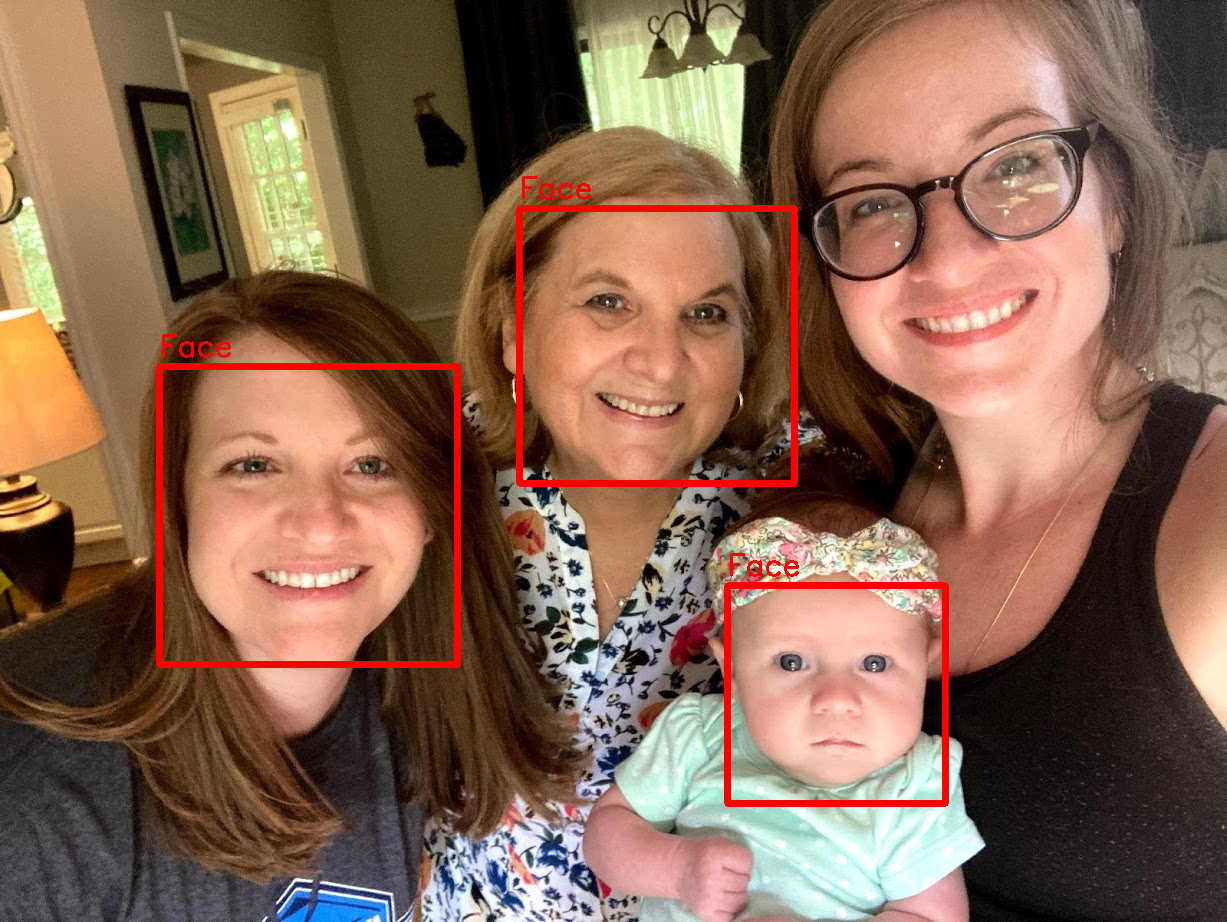

In [ ]:
input_image = cv2.imread("multi-face2.jpg")
output = face_detector(input_image)
cv2_imshow(output)
cv2.destroyAllWindows()

In [ ]:
faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_alt2.xml")
model = load_model("mask_recog.h5")

def face_mask_detector(frame):
  # frame = cv2.imread(fileName)
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  faces = faceCascade.detectMultiScale(gray,
                                        scaleFactor=1.1,
                                        minNeighbors=5,
                                        minSize=(60, 60),
                                        flags=cv2.CASCADE_SCALE_IMAGE)
  faces_list=[]
  preds=[]
  for (x, y, w, h) in faces:
      #print("faces len ",len(faces))
      face_frame = frame[y:y+h,x:x+w]
      face_frame = cv2.cvtColor(face_frame, cv2.COLOR_BGR2RGB)
      face_frame = cv2.resize(face_frame, (224, 224))
      face_frame = img_to_array(face_frame)
      face_frame = np.expand_dims(face_frame, axis=0)
      face_frame =  preprocess_input(face_frame)
      faces_list.append(face_frame)
      #print("list len: ",len(faces_list))
      if len(faces_list)>0:
          preds = model.predict(faces_list[-1])
      for pred in preds:
          #print(pred)
          (mask, withoutMask) = pred
          #print(mask, withoutMask)
      label = "Mask" if mask > withoutMask else "No Mask"
      color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
      label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
      cv2.putText(frame, label, (x, y- 10),
                  cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

      cv2.rectangle(frame, (x, y), (x + w, y + h),color, 3)
  # cv2_imshow(frame)

  return frame

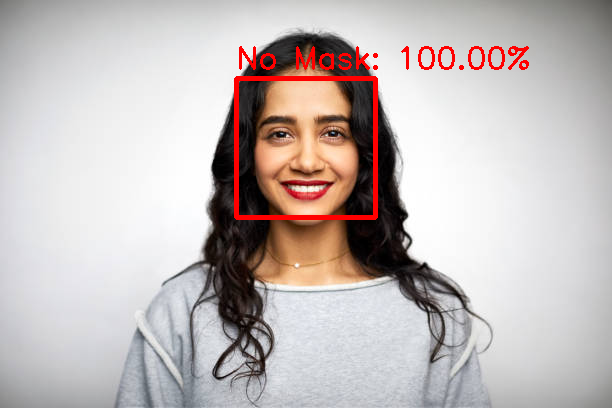

In [ ]:
input_image = cv2.imread("headshot2.jpg")
output = face_mask_detector(input_image)
cv2_imshow(output)
cv2.destroyAllWindows()

1


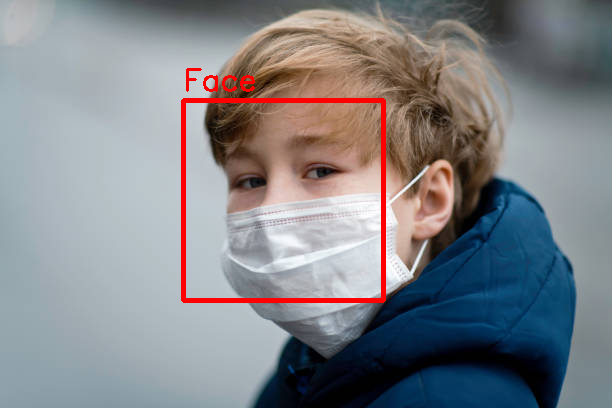

In [ ]:
input_image = cv2.imread("headshot9.jpg")
output = face_detector(input_image)
cv2_imshow(output)
cv2.destroyAllWindows()

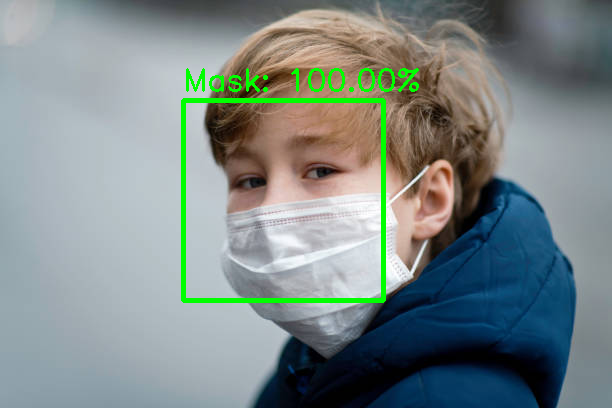

In [ ]:
input_image = cv2.imread("headshot9.jpg")
output = face_mask_detector(input_image)
cv2_imshow(output)

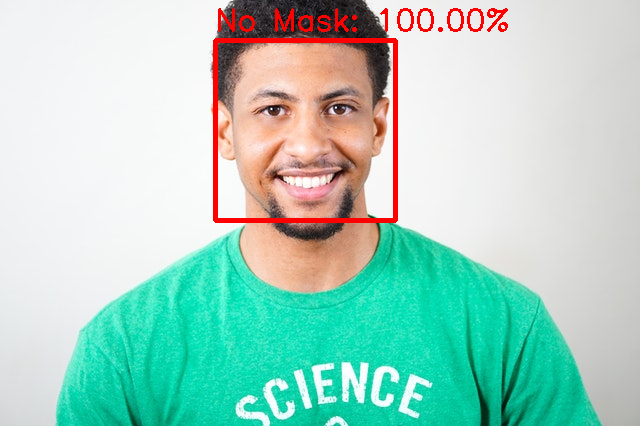

In [ ]:
input_image = cv2.imread("image4.jpg")
output = face_mask_detector(input_image)
cv2_imshow(output)

In [ ]:
cap = cv2.VideoCapture('video.mp4')
ret, frame = cap.read()
frame_height, frame_width, _ = frame.shape
out = cv2.VideoWriter('output.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
print("Processing Video...")
while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
    out.release()
    break
  output = face_mask_detector(frame)
  out.write(output)
out.release()
print("Done processing video")

Processing Video...
faces len  1
list len:  1
[2.0740479e-05 9.9997926e-01]
2.074048e-05 0.99997926
faces len  1
list len:  1
[1.1803573e-05 9.9998820e-01]
1.1803573e-05 0.9999882
faces len  1
list len:  1
[3.3136050e-05 9.9996686e-01]
3.313605e-05 0.99996686
faces len  1
list len:  1
[8.9325968e-06 9.9999106e-01]
8.932597e-06 0.99999106
faces len  1
list len:  1
[1.5653264e-05 9.9998438e-01]
1.5653264e-05 0.9999844
faces len  1
list len:  1
[1.5334645e-05 9.9998462e-01]
1.5334645e-05 0.9999846
faces len  1
list len:  1
[1.7088580e-04 9.9982905e-01]
0.0001708858 0.99982905
faces len  1
list len:  1
[1.4893885e-04 9.9985099e-01]
0.00014893885 0.999851
faces len  1
list len:  1
[1.0368866e-04 9.9989629e-01]
0.00010368866 0.9998963
faces len  1
list len:  1
[2.4310346e-05 9.9997568e-01]
2.4310346e-05 0.9999757
faces len  1
list len:  1
[4.3588305e-05 9.9995637e-01]
4.3588305e-05 0.99995637
faces len  1
list len:  1
[8.3601532e-05 9.9991643e-01]
8.360153e-05 0.99991643
faces len  1
list le